To use notebook:
1. Drag the dxf file into the following location: Anylogic/notebooks
2. Type in the name of the dxf file in the line l1 = openDXF("PUT FILE NAME HERE")
3. Run every block using shift + enter
4. The notebook with output a csv file called nodes_xyz.csv that will contain the easting, northing and elevation of the dxf nodes

In [2]:
import time
import os.path
from os import path
import pandas as pd
%matplotlib notebook 

In [3]:
def openDXF(filename):
    with open(filename + ".dxf") as f:
        lines = f.read().splitlines()
    return lines

In [4]:
def isolateVertex(dxf_list):
    start, end = 0, -1
    flag = False
    for i, c in enumerate(dxf_list):
        if c == "VERTEX" and flag is False:
            start = i
            flag = True
        if c == "ENDSEC":
            end = i+1
        if end > start and flag is True:
            return dxf_list[start:end]
    return None

In [5]:
start = time.time()

#####PUT NAME OF DXF FILE HERE#####
l1 = openDXF("road_for_year_123")

l2 = isolateVertex(l1)

nodes = []

for i, c in enumerate(l2):
    if c == "VERTEX" and i<(len(l2)-10):
        nodes.append([l2[i+6], l2[i+8], l2[i+10]])

df = pd.DataFrame(nodes, columns = ['x', 'y', 'z'])
if path.exists('nodes_xyz.csv'):
    os.remove('nodes_xyz.csv')
df.to_csv('nodes_xyz.csv', sep='\t', encoding='utf-8', index=False)

end = time.time()
print((end-start) * 10**3, "ms")
print(df)

7.082223892211914 ms
             x            y        z
0   740759.836  7642996.011  140.000
1   740778.331  7643043.218  140.000
2   740765.945  7643109.075  146.090
3   740754.580  7643121.433  147.649
4   740737.318  7643136.655  148.661
..         ...          ...      ...
58  741289.076  7643009.271  141.616
59  741295.911  7643017.532  140.825
60  741298.051  7643026.223  140.067
61  741296.171  7643069.985  140.000
62  741283.940  7643078.714  140.000

[63 rows x 3 columns]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import ipympl

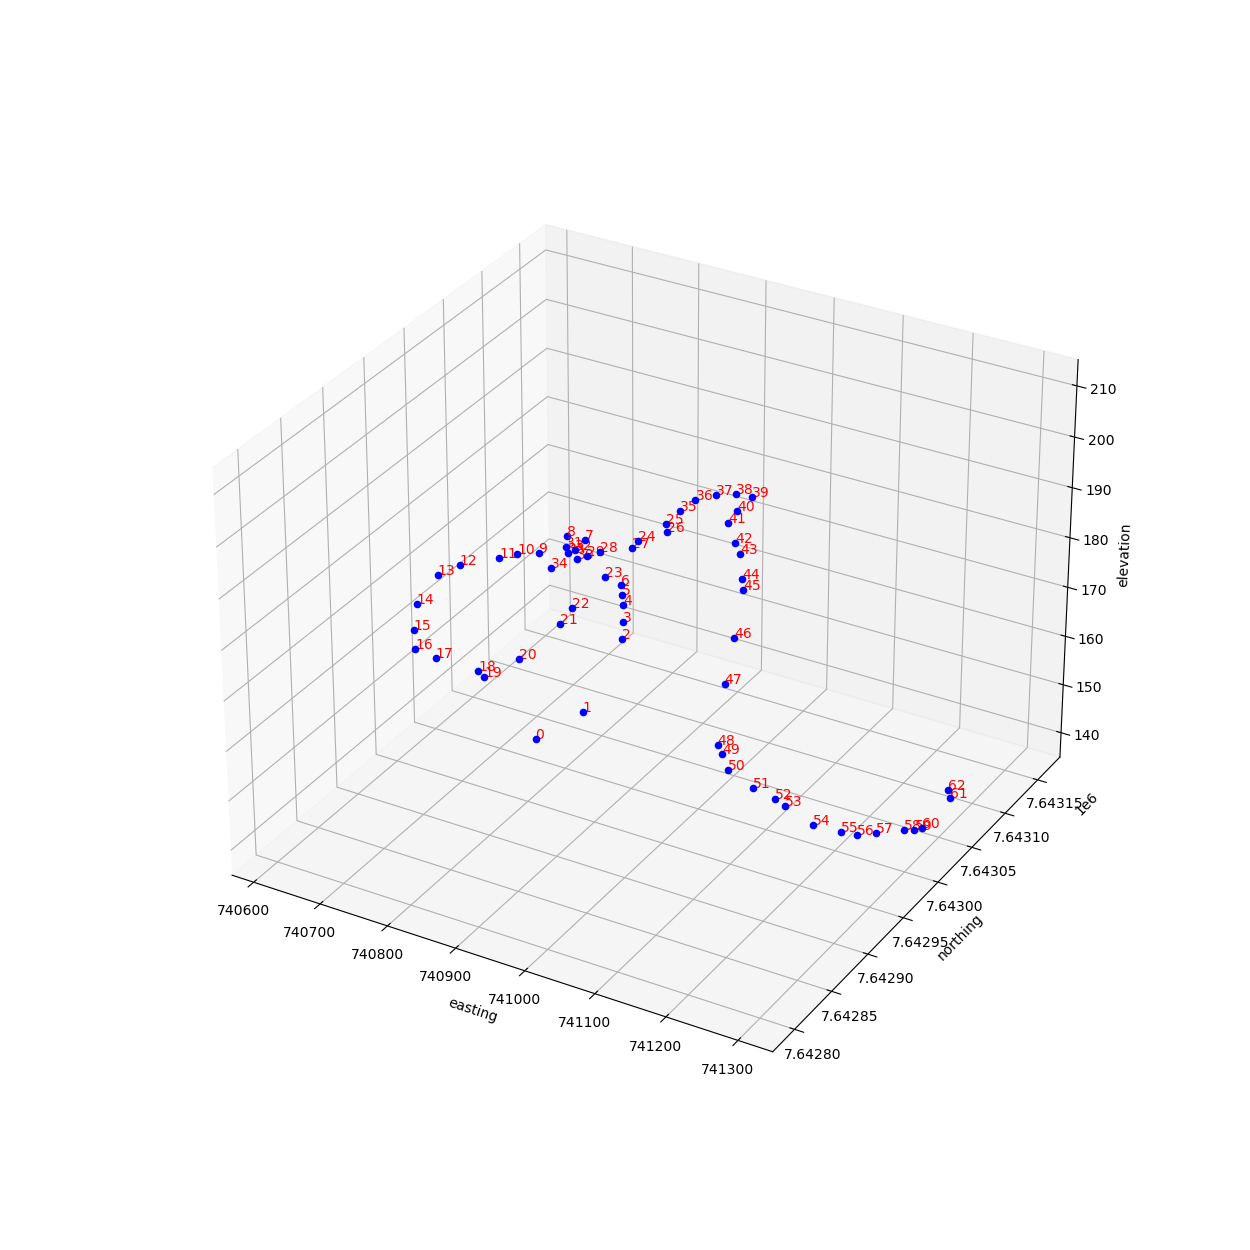

In [20]:
fig = plt.figure()
fig.set_size_inches(12.5, 12.5, forward=True)
ax = fig.add_subplot(projection='3d')
temp = [0,0,0]
flag = False

for i, point in enumerate(nodes):
    x = float(point[0])
    y = float(point[1])
    z = float(point[2])
    label = i
    ax.scatter(x, y, z, picker = 'True', color = 'b')
    ax.text(x, y, z, i, color = 'red')

ax.set_xlabel('easting')
ax.set_ylabel('northing')
ax.set_zlabel('elevation')

z
def onclick(event):
    global temp
    global flag
    x, y, z = event.artist._offsets3d
    a = [float(x), float(y), float(z)]
    ax.set_title(a)
    
    if a != temp and flag == True:
        ax.plot([a[0], temp[0]], [a[1], temp[1]], [a[2], temp[2]], color='black')
    else:
        flag = True
    temp = a    

def keyboardPress(event):
    global temp
    global flag
    if event.key == "z":
        ax.lines.pop(-1)
        temp, flag = [0,0,0], False
    elif event.key == "c":
        temp, flag = [0,0,0], False
    

fig.canvas.callbacks.connect('pick_event', onclick)
fig.canvas.callbacks.connect('key_press_event', keyboardPress)
plt.show()

140615687947840
